In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


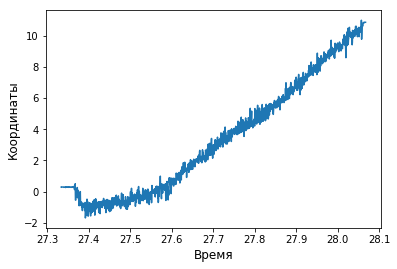

In [4]:
file_name = 'data1.xlsx'
data = pd.ExcelFile(file_name)
#print(type(data))

#print(data.sheet_names)

# 1 способ вытаскивания данных 
# df1 = data.parse('WinPos')
# print(df1)
# 2 способ
with open(file_name, 'r') as f: #чтение, r - read
    data_table = pd.read_excel(file_name, index_col = None, header = None)
#print(type(data_table))

#print(data_table.shape)

#print(data_table.info())

#print(data_table.iloc[:5,:5]) #вывод 5 строк и колонок

time = np.array(data_table[0][:-75]) #убираем последние 75 значений, где скачок
data = np.array(data_table[1][:-75])


fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,data)
plt.show()


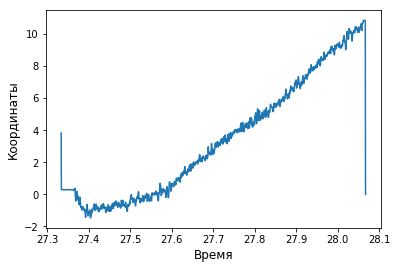

In [5]:
def average_data(arr):
    min_elem = arr[0]
    max_elem = arr[len(arr)-1]
    new_arr = np.zeros(len(arr))
    for x in range(len(arr)-1):
        if x == min_elem:
            new_arr[x] = (arr[x] + arr[x + 1])/2
        elif x == max_elem:
            new_arr[x] = (arr[x] + arr[x - 1])/2
        else:
            new_arr[x] = (arr[x - 1] + arr[x] + arr[x + 1])/3
    return new_arr
new_data = average_data(data)    

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,new_data)
plt.show()

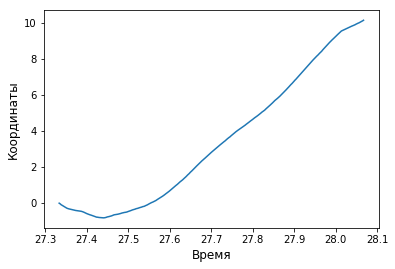

In [24]:
def average_data2(arr, N):
    len_arr = len(arr)
    result = np.zeros(len_arr)
    di = 0 if N % 2 == 0 else 1
    for i in range(len_arr):
        min_i = i - int(N/2)
        max_i = i + int(N/2)
        result[i] = np.average(arr[max(min_i,0): min(max_i + di, len_arr + 1)])
    return result

new_data2 = average_data2(data, 200) 

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,new_data2)
plt.show()
# print(new_data2)

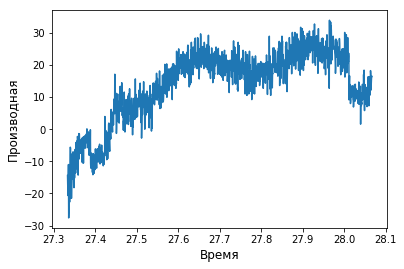

In [25]:
def diff(data_chto, time):
    len_arr = len(data_chto)
    if len(time) != len_arr:
        return None
    array_diff = np.zeros(len_arr)
    for i in range(len_arr-1):
        array_diff[i] = (data_chto[i+1] - data_chto[i])/(time[i+1]-time[i])
    array_diff[len_arr-1] = array_diff[len_arr - 2]
    return array_diff
        
Dif = diff(new_data2,time)


fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Производная", fontsize = 12)
ax.plot(time,Dif)
plt.show()
# diff(new_data2,time)

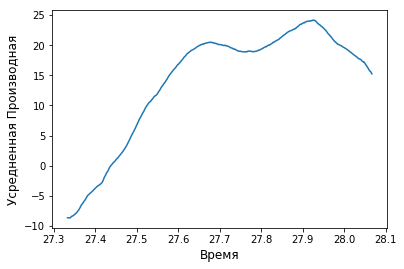

In [30]:
aver_dif = average_data2(Dif,300)

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Усредненная Производная", fontsize = 12)
ax.plot(time,aver_dif)
plt.show()

In [75]:
def model(x, k):
    M = np.zeros((len(x), k))
    A = np.zeros(k)
    for i in range (k):
        for j in range (len(x)):
            M[j][i] = x[j] ** (k - i - 1)
    A = linalg.inv(M.T ) 
    
    return M

model(time, 3)

array([[ 747.11835523,   27.33346585,    1.        ],
       [ 747.14872606,   27.3340214 ,    1.        ],
       [ 747.1790975 ,   27.33457696,    1.        ],
       ..., 
       [ 787.68284682,   28.06568807,    1.        ],
       [ 787.71403123,   28.06624363,    1.        ],
       [ 787.74521625,   28.06679918,    1.        ]])

NameError: name 'M' is not defined